# Setup for Performance Test

## Path Configuration

In [1]:
import os
import sys
import argparse

root = "../"*3
src_path = os.path.join(root, "kyoka")
sample_path = os.path.join(root, "sample")
sys.path.append(root)
sys.path.append(src_path)
sys.path.append(sample_path)

import logging as log
log.basicConfig(format='[%(levelname)s] %(message)s', level=log.INFO)

from kyoka.algorithm.montecarlo.montecarlo import MonteCarlo
from kyoka.algorithm.td_learning.sarsa import Sarsa
from kyoka.algorithm.td_learning.q_learning import QLearning
from kyoka.algorithm.td_learning.sarsa_lambda import SarsaLambda
from kyoka.algorithm.td_learning.q_lambda import QLambda

from kyoka.policy.greedy_policy import GreedyPolicy
from kyoka.policy.epsilon_greedy_policy import EpsilonGreedyPolicy
from kyoka.finish_rule.watch_iteration_count import WatchIterationCount

from sample.ticktacktoe.ticktacktoe_domain import TickTackToeDomain
from sample.ticktacktoe.ticktacktoe_table_value_function import TickTackToeTableValueFunction
from sample.ticktacktoe.ticktacktoe_helper import TickTackToeHelper
from sample.ticktacktoe.ticktacktoe_manual_policy import TickTackToeManualPolicy
from sample.ticktacktoe.ticktacktoe_perfect_policy import TickTackToePerfectPolicy
from sample.ticktacktoe.ticktacktoe_performance_logger import TickTackToePerformanceLogger

## Define Const for Performance Test

In [8]:
LOG_INTERVAL = 1000
TEST_GAME_COUNT = 10
TEST_INTERVAL = 10000
IS_FIRST_PLAYER = True

domain = TickTackToeDomain(is_first_player=IS_FIRST_PLAYER)

## Setup Global Item for Performance Test

In [6]:
def gen_performance_logger():
    callback = TickTackToePerformanceLogger()
    callback.set_performance_test_interval(TEST_INTERVAL)
    callback.set_is_first_player(IS_FIRST_PLAYER)
    callback.set_test_game_count(TEST_GAME_COUNT)
    return callback

def run_performance_test(rl_algo, epsilon, test_length):
    watch_iteration = WatchIterationCount(target_count=test_length, log_interval=LOG_INTERVAL)
    finish_rules = [watch_iteration]
    value_func = TickTackToeTableValueFunction()
    value_func.setUp()
    policy = EpsilonGreedyPolicy(domain, value_func, eps=epsilon)
    callback = gen_performance_logger()
    rl_algo.set_gpi_callback(callback)
    rl_algo.GPI(domain, policy, value_func, finish_rules)
    return callback.game_log

In [4]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt

def visualize_test_result(performance_test_result):
    labels = [TEST_INTERVAL * (i+1) for i in range(len(performance_test_result))]
    lose_log, draw_log, win_log = [[log[1][i] for log in performance_test_result] for i in range(3)]

    plt.figure(figsize=(10,5))
    plt.plot(labels, lose_log, label="lose rate")
    plt.plot(labels, draw_log, label="draw rate")
    plt.plot(labels, win_log, label="win rate")

    plt.xlabel("GPI iteration")
    plt.ylabel("rate(%)")
    plt.title("MonteCarlo")
    plt.legend(loc = 1)

    plt.show()

# MonteCarlo

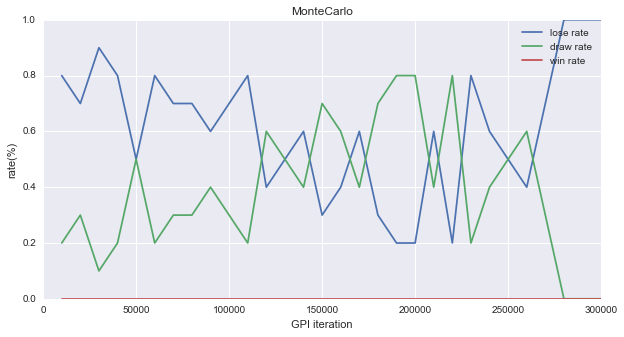

In [10]:
TEST_LENGTH = 300000
EPSILON = 0.1
performance_test_result = run_performance_test(MonteCarlo(), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

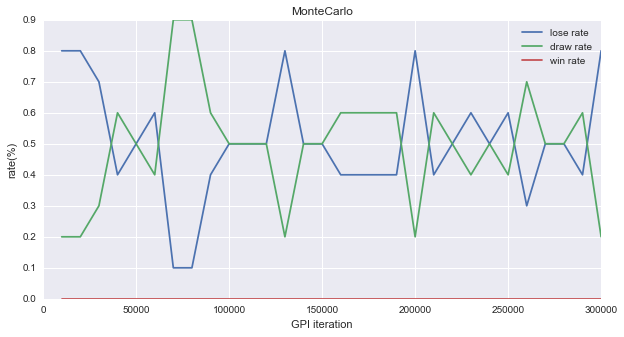

In [11]:
TEST_LENGTH = 300000
EPSILON = 0.3
performance_test_result = run_performance_test(MonteCarlo(), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

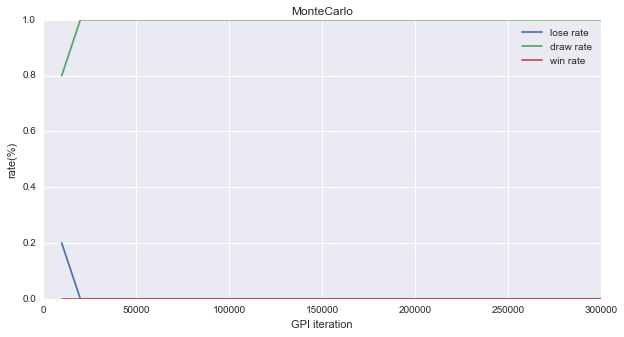

In [12]:
TEST_LENGTH = 300000
EPSILON = 0.7
performance_test_result = run_performance_test(MonteCarlo(), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

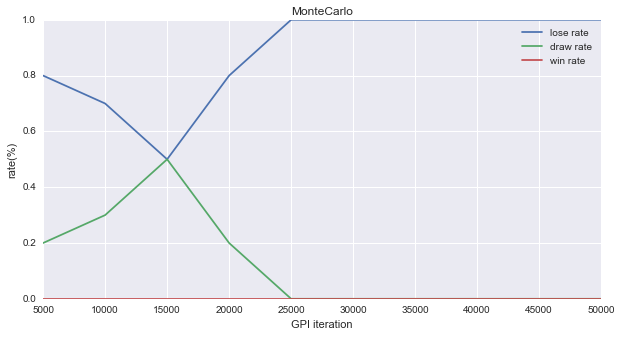

In [52]:
TEST_LENGTH = 50000
EPSILON = 0.7
performance_test_result = run_performance_test(MonteCarlo(), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

# Sarsa

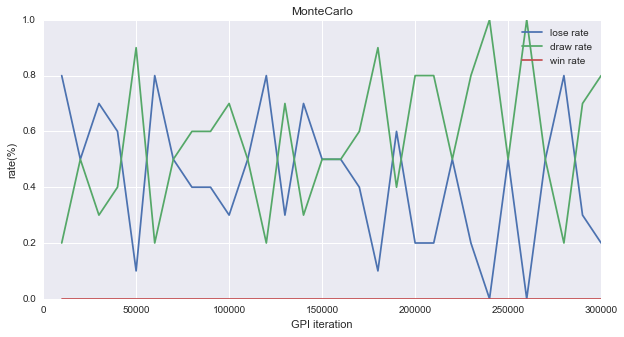

In [15]:
TEST_LENGTH = 300000
EPSILON = 0.1
performance_test_result = run_performance_test(Sarsa(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

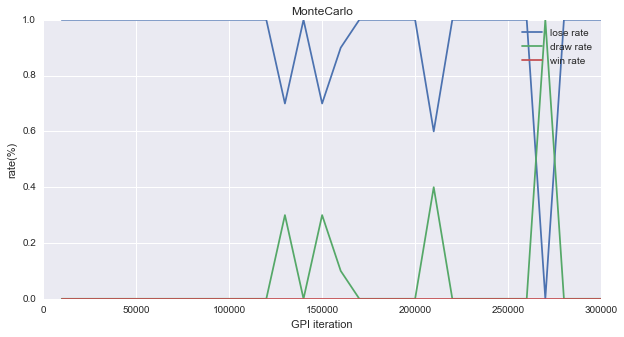

In [13]:
TEST_LENGTH = 300000
EPSILON = 0.3
performance_test_result = run_performance_test(Sarsa(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

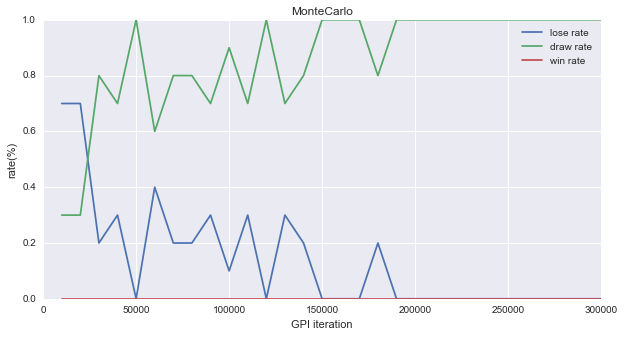

In [14]:
TEST_LENGTH = 300000
EPSILON = 0.7
performance_test_result = run_performance_test(Sarsa(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

# QLearning

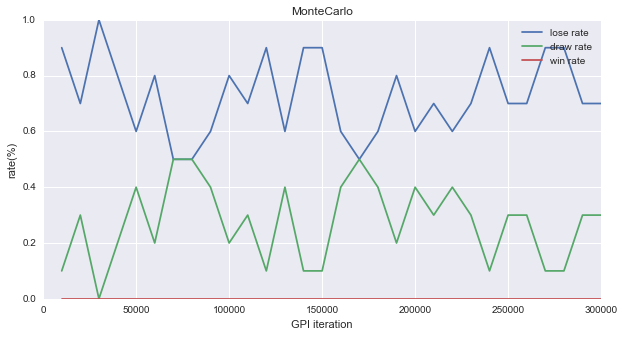

In [16]:
TEST_LENGTH = 300000
EPSILON = 0.1
performance_test_result = run_performance_test(QLearning(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

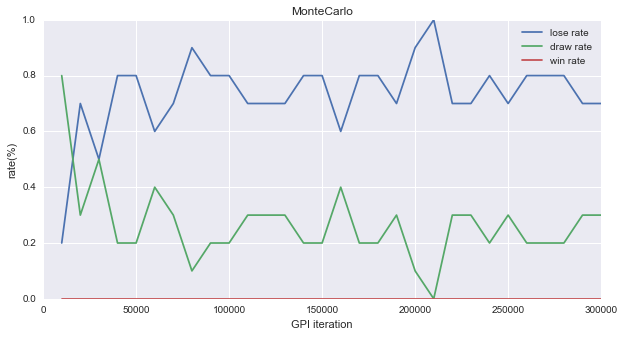

In [17]:
TEST_LENGTH = 300000
EPSILON = 0.3
performance_test_result = run_performance_test(QLearning(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

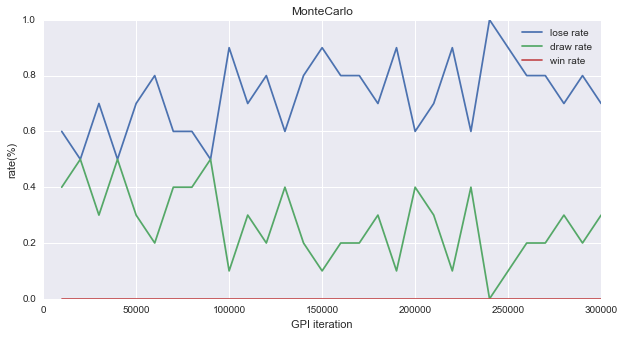

In [18]:
TEST_LENGTH = 300000
EPSILON = 0.7
performance_test_result = run_performance_test(QLearning(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

# SarsaLambda

In [ ]:
performance_test_result = run_performance_test(SarsaLambda())
visualize_test_result(performance_test_result)

# QLambda

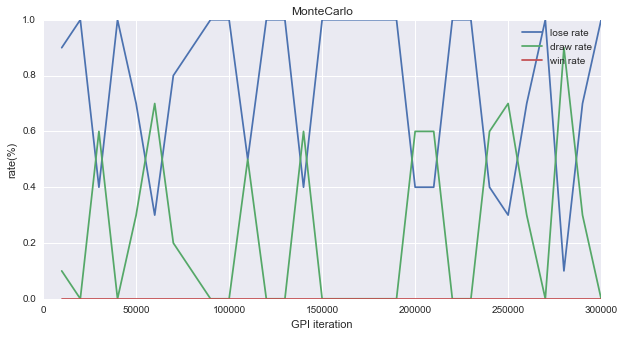

In [19]:
TEST_LENGTH = 300000
EPSILON = 0.3
performance_test_result = run_performance_test(QLambda(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)

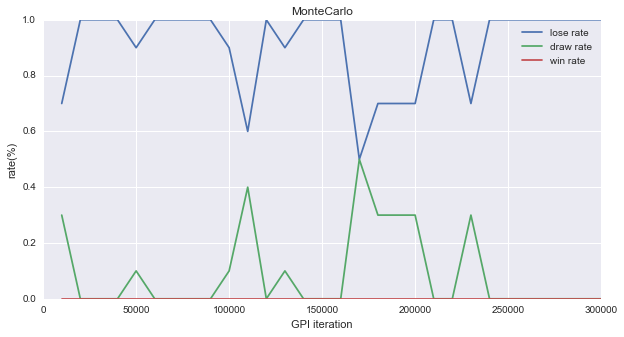

In [20]:
TEST_LENGTH = 300000
EPSILON = 0.7
performance_test_result = run_performance_test(QLambda(alpha=0.1, gamma=0.7), epsilon=EPSILON, test_length=TEST_LENGTH)
visualize_test_result(performance_test_result)